In [141]:
import pandas
import numpy as np
import statistics as stats

#Imports para calcular círculo a partir de tres puntos
from sympy import Eq
from sympy.geometry import Point, Circle

#Imports para dibujar un circulo
import matplotlib.pyplot as plt

import random as rd


class Point(): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def print(self):
        print('(',self.x, ', ',self.y,')')
    def __repr__(self):
        return '(%s, %s)' % (self.x,self.y)
    def __str__(self):
        return '(%s, %s)' % (self.x,self.y)
    
class Cluster(): 
    def __init__(self, x, y, radius):
        self.center = Point(x,y)
        self.radius = radius
        
    def print(self):
        print('Center: ',self.center, ' Radio: ',self.radius)
    def __repr__(self):
        return 'Center: %s Radius: %s' % (self.center,self.radius)
    def __str__(self):
        return 'Center: %s Radius: %s' % (self.center,self.radius)
    
    
class ClusterWithPoints(): 
    def __init__(self,cluster):
        self.cluster = cluster
        self.points = []
        
    def addPoint(self,point):
        self.points.append(point)
        
        
    def deletePoint(self,point):
        self.points.remove(point)
        
    def print(self):
        print('Cluster: ',self.cluster, ' Points: ',self.points)
    def __repr__(self):
        return 'Cluster: %s Points: %s' % (self.cluster,self.points)
    def __str__(self):
        return 'Cluster: %s Points: %s' % (self.cluster,self.points)
    
    
    
    
def drawCircleAndPoints(clustersWithPoints):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    colors = ['red','blue','green','black','yellow','purple']
    
    for i in range(len(clustersWithPoints)):
       
        cwp = clustersWithPoints[i]
        Xs = []
        Ys = []
        
        for p in cwp.points:
            Xs.append(p.x)
            Ys.append(p.y)
        plt.plot(Xs, Ys, 'ro', color=colors[i])
        
        plt.plot(cwp.cluster.center.x,cwp.cluster.center.y, 'ro', color=colors[i])
        circle = plt.Circle((cwp.cluster.center.x, cwp.cluster.center.y), cwp.cluster.radius, color=colors[i], fill=False)
        ax=plt.gca()
        ax.add_patch(circle)
        plt.axis('scaled')
    
    plt.show()

In [106]:
def obtener_3_puntos(puntos):
    
    aux_x_max = 0
    aux_x_min = 0
    aux_y_max = 0
    
    #print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
    #print(puntos)

    for i in range(len(puntos)):

        if(puntos[i].x > aux_x_max or i==0):
            px_max = puntos[i]
            aux_x_max = puntos[i].x

        if(puntos[i].x < aux_x_min or i == 0):
            px_min = puntos[i]
            aux_x_min = puntos[i].x   

        if((puntos[i].y > aux_y_max or i == 0) and (puntos[i] != px_max and puntos[i] != px_min)):
            py_max = puntos[i]
            aux_y_max = puntos[i].y        
    
    return px_max,px_min,py_max 

In [118]:
def clusters_iniciales(puntos,n_clusters):
    
    px_max, px_min, py_max = obtener_3_puntos(puntos)
    x_max = px_max.x
    x_min = px_min.x
    y_max = py_max.y
    rang = abs(x_max-x_min)/n_clusters
    
    clusters = []
    
    for i in range(n_clusters):
        cluster = Cluster(x_min + i*rang ,y_max/2, 1)
        clusters.append(cluster)
    
    return clusters

In [119]:
def get_cluster(puntos): # REF: codewars.com/kata/give-the-center-and-the-radius-of-circumscribed-circle-a-warm-up-challenge/python
    
    x1 = puntos[0].x
    x2 = puntos[1].x
    x3 = puntos[2].x
    y1 = puntos[0].y
    y2 = puntos[1].y
    y3 = puntos[2].y
    
    D = 2*(x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
    Ux = ((pow(x1,2) + pow(y1,2)) * (y2-y3) + (pow(x2,2) + pow(y2,2)) * (y3-y1) + (pow(x3,2) + pow(y3,2)) * (y1-y2))/D
    Uy = ((pow(x1,2) + pow(y1,2)) * (x3-x2) + (pow(x2,2) + pow(y2,2)) * (x1-x3) + (pow(x3,2) + pow(y3,2)) * (x2-x1))/D
    AB = np.sqrt(float(pow(x2-x1,2) + pow(y2-y1,2)))
    BC = np.sqrt(float(pow(x3-x2,2) + pow(y3-y2,2)))
    AC = np.sqrt(float(pow(x3-x1,2) + pow(y3-y1,2)))
    diametro = (2*AB*BC*AC)/abs(D)
    
    res = Cluster(float(Ux),float(Uy),float(diametro/2))
    
    return res

In [120]:
def grados_pertenencia(p,clusters):
    
    #Calculamos la distancia de el punto a cada cluster
    distancias = []
    
    for i in range(len(clusters)):
        d = np.sqrt(pow(p.x - clusters[i].center.x,2) + pow(p.y - clusters[i].center.y,2))
        distancias.append(abs(d-clusters[i].radius))
    
    #Calculamos el grado de pertencia a cada cluster
    pertenencias = []
    
    for i in range(len(clusters)):
        if(distancias[i]==0.0):
            per = 100.0
        else:
            per = 100/(pow(distancias[i],2))
        pertenencias.append(per)
        
    #Normalizamos
    suma = sum(pertenencias)
    pertenencias = np.divide(pertenencias,suma)
    
    return pertenencias

In [121]:
#Le pasamos los 3 puntos con mayor grado de pertenencia a un cluster:
def puntos_mayor_grado_por_cluster(puntos,cluster,n_cluster):
    per = []
    res = []

    for i in range(len(puntos)):
        per.append(grados_pertenencia(puntos[i],cluster)[n_cluster])
    
    res.append(puntos[per.index(max(per))])
    puntos = np.delete(puntos,per.index(max(per)),0)
    per.remove(max(per))
    
    res.append(puntos[per.index(max(per))])
    puntos = np.delete(puntos,per.index(max(per)),0)
    per.remove(max(per))
    
    res.append(puntos[per.index(max(per))])
    
    return res

In [129]:
def get_real_clusters(puntos,clusters):
    new_clusters = []
    for cluster in clusters:
        
        points = cluster.points
        point = obtener_3_puntos(points)
        new_clusters.append(get_cluster(point))
        
        
    res = getClustersWithPoints(new_clusters, puntos)
        
    return res

In [130]:
def iterar_get_real_cluster(puntos,prev_clusters,razon, max_iteraciones, imprimir):
    
    iterar = 1
    iteraciones = 0;
    
    while(iterar and iteraciones <= max_iteraciones):
        iteraciones = iteraciones + 1
        nuevo_factor = []
        next_clusters = get_real_clusters(puntos,prev_clusters)
        if(imprimir):
            print(next_clusters)
        for i in range(len(prev_clusters)):
            nuevo_factor.append(np.sqrt((prev_clusters[i].cluster.center.x - next_clusters[i].cluster.center.x)**2 + (prev_clusters[i].cluster.center.y - next_clusters[i].cluster.center.y)**2) + abs(prev_clusters[i].cluster.radius - next_clusters[i].cluster.radius))
            if(imprimir):
                print(nuevo_factor)
        if(max(nuevo_factor) < razon):    
            iterar = 0
        prev_clusters = next_clusters
    return next_clusters

In [131]:
def getClustersWithPoints(clusters, puntos):
    
   
    res = []
    for cluster in clusters:
        res.append(ClusterWithPoints(cluster))
    
    for p in puntos:
        gradosPert = grados_pertenencia(p,clusters)
        ind = np.where(gradosPert == max(gradosPert))
        res[ind[0][0]].addPoint(p)
    
    return res

[Cluster: Center: (9.0, 4.9714285714285715) Radius: 3.0001360513367747 Points: [(9.0, 8.0), (7.0, 7.3), (6.0, 5.0), (12.0, 5.0), (9.0, 2.0), (11.0, 2.7), (6.4, 3.5), (11.0, 7.2), (11.0, 5.0), (9.0, 7.0), (7.0, 5.0), (9.0, 3.0), (7.4, 3.8), (7.4, 6.2), (10.4, 3.6), (6.2, 6.0), (6.6, 6.8), (8.0, 7.8), (9.9, 7.8), (10.5, 7.6), (11.2, 7.0), (11.6, 6.6), (11.7, 6.3), (11.8, 6.0), (11.9, 5.7), (12.0, 4.6), (11.9, 4.2), (11.8, 3.8), (11.6, 3.5), (10.5, 2.4), (8.2, 2.1), (7.4, 2.5), (6.1, 4.2), (8.0, 6.7), (7.7, 3.5), (8.0, 3.3), (8.3, 3.1), (9.5, 3.1), (10.8, 4.2)], Cluster: Center: (3.784782608695649, 17.232608695652168) Radius: 12.6480962351767 Points: [(10.6, 6.2), (15.9, 13.6), (15.5, 22.0), (7.2, 6.0), (7.1, 5.6), (7.0, 4.6), (7.1, 4.3), (10.8, 5.9), (9.8, 6.8)], Cluster: Center: (20.0, 18.0) Radius: 5.999999999999999 Points: [(20.0, 12.0), (20.0, 24.0), (22.0, 23.7), (24.0, 22.5), (24.4, 22.0), (25.6, 20.1), (26.0, 18.0), (25.6, 16.0), (24.4, 14.0), (24.0, 13.5), (22.1, 12.4), (17.9, 12

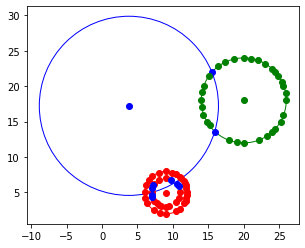

In [144]:
#Agustin 2+:

#Todos los puntos:
puntoscsv = pandas.read_csv('Data/puntos_agustin_2.csv', header=None, names=['x', 'y']).values
puntos = []
for i in range(len(puntoscsv)):
    puntos.append(Point(puntoscsv[i][0],puntoscsv[i][1]))
puntos

#Clusters iniciales:
clusters_inicio = clusters_iniciales(puntos,3)
c = getClustersWithPoints(clusters_inicio,puntos)
clusters = iterar_get_real_cluster(puntos,c,0.000002,100,0)
print(clusters)

drawCircleAndPoints(clusters)

In [115]:
puntos = []
puntos.append(Point(11.6,6.6))
puntos.append(Point(11.2,7.0))
puntos.append(Point(11.0,7.2))
get_cluster_casero(puntos)

NameError: name 'get_cluster_casero' is not defined

In [ ]:
puntos = []
puntos.append(Point(0,0))
puntos.append(Point(4,0))
puntos.append(Point(2,2))
get_cluster_casero(puntos)

In [ ]:
circle = Circle(Point(11.6,6.6), Point(11.2,7.0), Point(11.0,7.2))
circle

In [ ]:
puntos = []
puntos.append(Point(0,0))
puntos.append(Point(4,0))
puntos.append(Point(2,2))
get_cluster_casero(puntos)

In [ ]:
puntos = []
puntos.append(Point(11.6,6.6))
puntos.append(Point(11.2,7.0))
puntos.append(Point(11.0,7.2))
get_cluster_casero(puntos)